In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
import graphviz
from sklearn import tree
from IPython.display import Image
import io
from scipy.stats import zscore
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,recall_score, precision_score
from sklearn.metrics import accuracy_score, f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("diabetic_data_250_all.csv")   
data.head().T

0                1          2          3  \
race                      Caucasian  AfricanAmerican  Caucasian  Caucasian   
gender                       Female           Female       Male       Male   
age                         [10-20)          [20-30)    [30-40)    [40-50)   
admission_type_id                 1                1          1          1   
discharge_disposition_id          1                1          1          1   
admission_source_id               7                7          7          7   
time_in_hospital                  3                2          2          1   
num_lab_procedures               59               11         44         51   
num_procedures                    0                5          1          0   
num_medications                  18               13         16          8   
number_outpatient                 0                2          0          0   
number_emergency                  0                0          0          0   
number_inpatient                  0                1          0          0   
number_diagnoses                  9                6          7          5   
max_glu_serum                  None             None       None       None   
A1Cresult                      None             None       None       None   
metformin                        No               No         No         No   
repaglinide                      No               No         No         No   
nateglinide                      No               No         No         No   
chlorpropamide                   No               No         No         No   
glimepiride                      No               No         No         No   
glipizide                        No           Steady         No     Steady   
glyburide                        No               No         No         No   
tolbutamide                      No               No         No         No   
pioglitazone                     No               No         No         No   
rosiglitazone                    No               No         No         No   
acarbose                         No               No         No         No   
miglitol                         No               No         No         No   
troglitazone                     No               No         No         No   
tolazamide                       No               No         No         No   
insulin                          Up               No         Up     Steady   
glyburide-metformin              No               No         No         No   
glipizide-metformin              No               No         No         No   
glimepiride-pioglitazone         No               No         No         No   
metformin-pioglitazone           No               No         No         No   
change                           Ch               No         Ch         Ch   
readmitted                      >30               NO         NO         NO   

                                  4  
race                      Caucasian  
gender                         Male  
age                         [50-60)  
admission_type_id                 2  
discharge_disposition_id          1  
admission_source_id               2  
time_in_hospital                  3  
num_lab_procedures               31  
num_procedures                    6  
num_medications                  16  
number_outpatient                 0  
number_emergency                  0  
number_inpatient                  0  
number_diagnoses                  9  
max_glu_serum                  None  
A1Cresult                      None  
metformin                        No  
repaglinide                      No  
nateglinide                      No  
chlorpropamide                   No  
glimepiride                      No  
glipizide                        No  
glyburide                        No  
tolbutamide                      No  
pioglitazone                     No  
rosiglitazone                    No  
acarbose                         No  
migli

In [3]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'readmitted'],
      dtype='object')

In [4]:
data=data.drop(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult','change','readmitted' ],axis=1)

In [5]:
data.columns

Index(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 19 columns):
metformin                   30490 non-null object
repaglinide                 30490 non-null object
nateglinide                 30490 non-null object
chlorpropamide              30490 non-null object
glimepiride                 30490 non-null object
glipizide                   30490 non-null object
glyburide                   30490 non-null object
tolbutamide                 30490 non-null object
pioglitazone                30490 non-null object
rosiglitazone               30490 non-null object
acarbose                    30490 non-null object
miglitol                    30490 non-null object
troglitazone                30490 non-null object
tolazamide                  30490 non-null object
insulin                     30490 non-null object
glyburide-metformin         30490 non-null object
glipizide-metformin         30490 non-null object
glimepiride-pioglitazone    30490 non-nul

In [7]:
data = pd.get_dummies(data)

In [8]:
data.columns

Index(['metformin_Down', 'metformin_No', 'metformin_Steady', 'metformin_Up',
       'repaglinide_Down', 'repaglinide_No', 'repaglinide_Steady',
       'repaglinide_Up', 'nateglinide_Down', 'nateglinide_No',
       'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_Down',
       'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up',
       'glimepiride_Down', 'glimepiride_No', 'glimepiride_Steady',
       'glimepiride_Up', 'glipizide_Down', 'glipizide_No', 'glipizide_Steady',
       'glipizide_Up', 'glyburide_Down', 'glyburide_No', 'glyburide_Steady',
       'glyburide_Up', 'tolbutamide_No', 'tolbutamide_Steady',
       'pioglitazone_Down', 'pioglitazone_No', 'pioglitazone_Steady',
       'pioglitazone_Up', 'rosiglitazone_Down', 'rosiglitazone_No',
       'rosiglitazone_Steady', 'rosiglitazone_Up', 'acarbose_No',
       'acarbose_Steady', 'acarbose_Up', 'miglitol_Down', 'miglitol_No',
       'miglitol_Steady', 'miglitol_Up', 'troglitazone_No',
       'troglitazone_Stead

In [9]:
data[['insulin_Up','insulin_No','insulin_Steady','insulin_Down']].head()

insulin_Up  insulin_No  insulin_Steady  insulin_Down
0           1           0               0             0
1           0           1               0             0
2           1           0               0             0
3           0           0               1             0
4           0           0               1             0

# Model for insulin_steady

In [10]:
X = data.drop(['insulin_Up','insulin_No','insulin_Steady','insulin_Down'],axis=1)
Y = data[['insulin_Up']]
print(X.shape)
print(Y.shape)

(30490, 59)
(30490, 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21343, 59), (9147, 59), (21343, 1), (9147, 1))

# Decision Tree

In [12]:
for i in range(2,10):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_saxmples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned_train = clf_pruned.predict(X_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy_train=',accuracy_score(y_train,preds_pruned_train))
    print('accuracy_test=',accuracy_score(y_test,preds_pruned))
    print('auc_score_train=',roc_auc_score(y_train,preds_pruned_train))
    print('auc_score_test=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[7743    0]
 [1404    0]]
accuracy_train= 0.8443049243311624
accuracy_test= 0.8465070514922926
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 3
confusion matrix = 
 [[7743    0]
 [1404    0]]
accuracy_train= 0.8443049243311624
accuracy_test= 0.8465070514922926
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 4
confusion matrix = 
 [[7743    0]
 [1404    0]]
accuracy_train= 0.8443049243311624
accuracy_test= 0.8465070514922926
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 5
confusion matrix = 
 [[7740    3]
 [1403    1]]
accuracy_train= 0.8443986318699339
accuracy_test= 0.8462884005684924
auc_score_train= 0.5005463718882587
auc_score_test= 0.5001624019930878
**********************************************

In [13]:
clf_pruned=DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

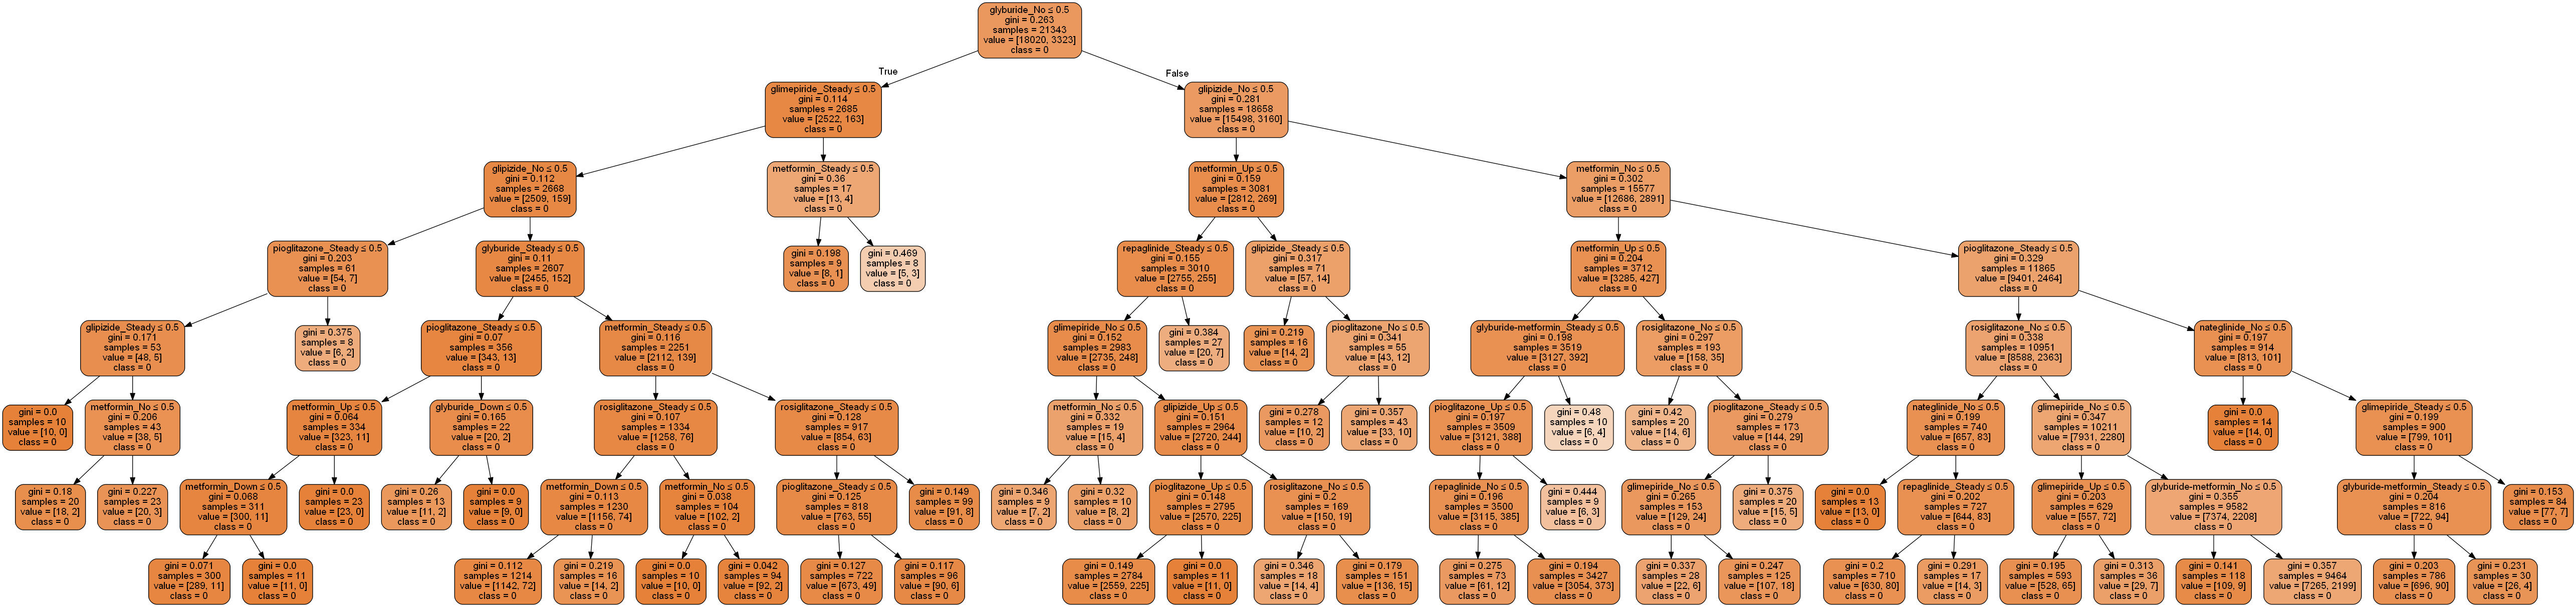

In [14]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(20)

0
glyburide_No                0.243327
glipizide_No                0.219844
metformin_No                0.213196
pioglitazone_Steady         0.085551
rosiglitazone_No            0.079708
glimepiride_No              0.073414
glyburide-metformin_No      0.024931
metformin_Up                0.015800
repaglinide_Steady          0.007881
glyburide-metformin_Steady  0.007424
glimepiride_Steady          0.005258
pioglitazone_Up             0.004560
metformin_Steady            0.003246
nateglinide_No              0.002986
glimepiride_Up              0.002145
repaglinide_No              0.001936
glipizide_Steady            0.001908
glyburide_Steady            0.001719
rosiglitazone_Steady        0.001553
glipizide_Up                0.001426

# logistic regression:

In [16]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
mat_logit = confusion_matrix(y_test,y_pred_test)
print("confusion matrix = \n",mat_logit)
print('accuracy_train=',accuracy_score(y_train,y_pred_train))
print('accuracy_test=',accuracy_score(y_test,y_pred_test))
print('auc_score_train=',roc_auc_score(y_train,y_pred_train))
print('auc_score_test=',roc_auc_score(y_test,y_pred_test))    

confusion matrix = 
 [[7743    0]
 [1404    0]]
accuracy_train= 0.8443517781005482
accuracy_test= 0.8465070514922926
auc_score_train= 0.5001504664459826
auc_score_test= 0.5


# Model for insulin_Down

In [17]:
X = data.drop(['insulin_Up','insulin_No','insulin_Steady','insulin_Down'],axis=1)
Y = data[['insulin_Down']]
print(X.shape)
print(Y.shape)

(30490, 59)
(30490, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21343, 59), (9147, 59), (21343, 1), (9147, 1))

# Decision Tree

In [19]:
for i in range(2,10):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned_train = clf_pruned.predict(X_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy_train=',accuracy_score(y_train,preds_pruned_train))
    print('accuracy_test=',accuracy_score(y_test,preds_pruned))
    print('auc_score_train=',roc_auc_score(y_train,preds_pruned_train))
    print('auc_score_test=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[7530    0]
 [1617    0]]
accuracy_train= 0.8202220868668885
accuracy_test= 0.8232207281075763
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 3
confusion matrix = 
 [[7530    0]
 [1617    0]]
accuracy_train= 0.8202220868668885
accuracy_test= 0.8232207281075763
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 4
confusion matrix = 
 [[7530    0]
 [1617    0]]
accuracy_train= 0.8202220868668885
accuracy_test= 0.8232207281075763
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 5
confusion matrix = 
 [[7530    0]
 [1617    0]]
accuracy_train= 0.8202220868668885
accuracy_test= 0.8232207281075763
auc_score_train= 0.5
auc_score_test= 0.5
****************************************************************************

In [20]:
clf_pruned=DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

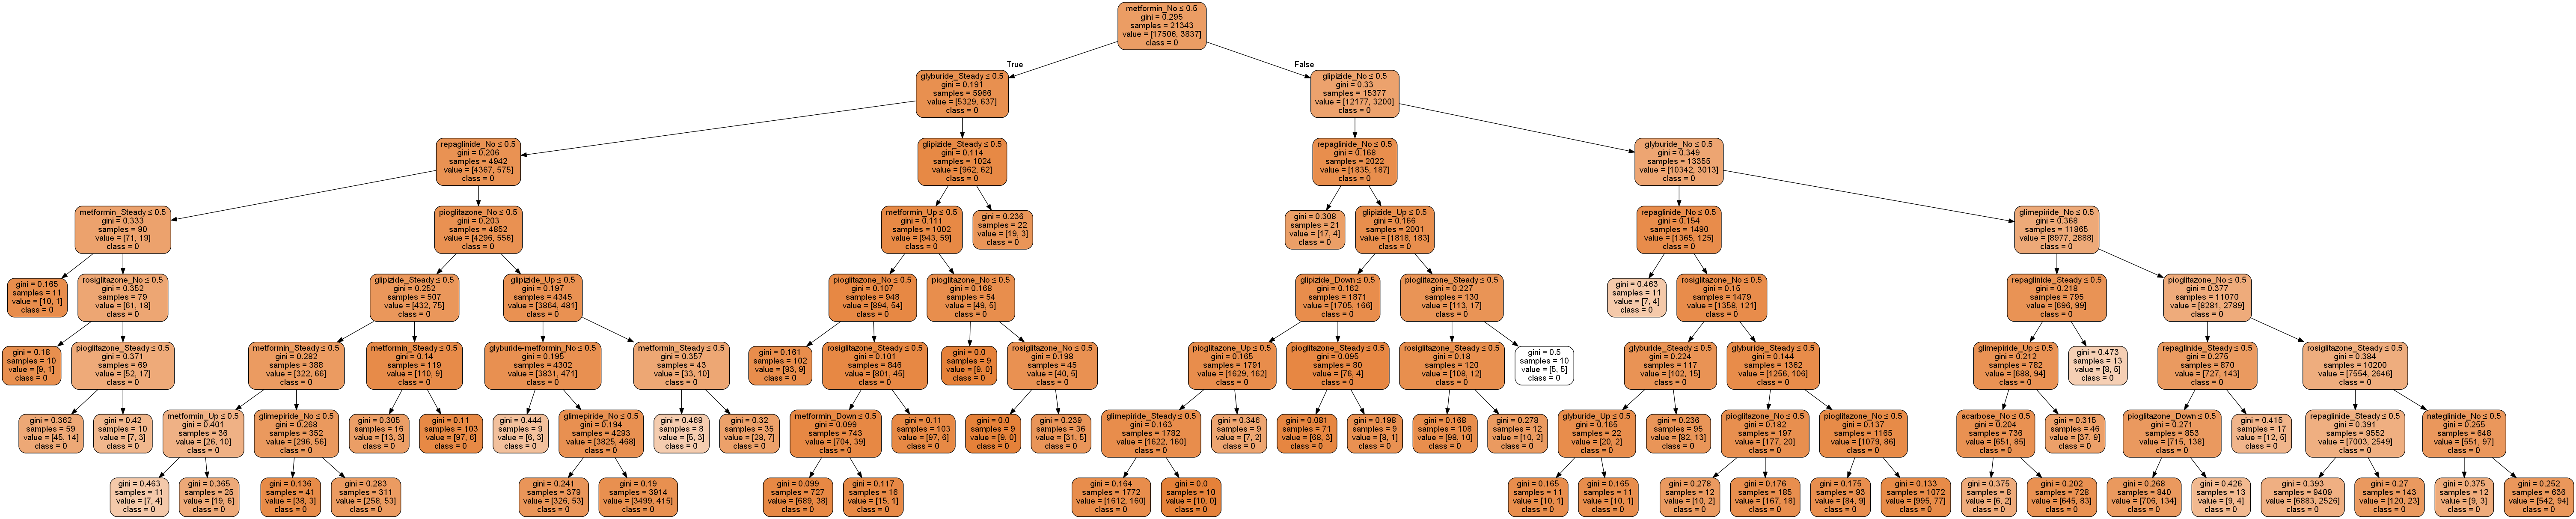

In [21]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(15)

0
metformin_No            0.289103
glyburide_No            0.220630
glipizide_No            0.203865
glimepiride_No          0.083708
rosiglitazone_Steady    0.054974
pioglitazone_No         0.053598
repaglinide_Steady      0.018456
glyburide_Steady        0.018396
repaglinide_No          0.012407
pioglitazone_Steady     0.010143
metformin_Steady        0.007021
glipizide_Steady        0.006171
glipizide_Up            0.005632
rosiglitazone_No        0.003927
glyburide-metformin_No  0.002960

# Logistic Regression

In [23]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
mat_logit = confusion_matrix(y_test,y_pred_test)
print("confusion matrix = \n",mat_logit)
print('accuracy_train=',accuracy_score(y_train,y_pred_train))
print('accuracy_test=',accuracy_score(y_test,y_pred_test))
print('auc_score_train=',roc_auc_score(y_train,y_pred_train))
print('auc_score_test=',roc_auc_score(y_test,y_pred_test))    

confusion matrix = 
 [[7530    0]
 [1617    0]]
accuracy_train= 0.8202220868668885
accuracy_test= 0.8232207281075763
auc_score_train= 0.5
auc_score_test= 0.5



# Model for insulin_steady

In [24]:
X = data.drop(['insulin_Up','insulin_No','insulin_Steady','insulin_Down'],axis=1)
Y = data[['insulin_Steady']]
print(X.shape)
print(Y.shape)

(30490, 59)
(30490, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21343, 59), (9147, 59), (21343, 1), (9147, 1))

# Decision Tree

In [26]:
for i in range(2,10):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned_train = clf_pruned.predict(X_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy_train=',accuracy_score(y_train,preds_pruned_train))
    print('accuracy_test=',accuracy_score(y_test,preds_pruned))
    print('auc_score_train=',roc_auc_score(y_train,preds_pruned_train))
    print('auc_score_test=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[5600    0]
 [3547    0]]
accuracy_train= 0.6146277468022302
accuracy_test= 0.6122225866404285
auc_score_train= 0.5
auc_score_test= 0.5
*******************************************************************************
for depth= 3
confusion matrix = 
 [[5593    7]
 [3546    1]]
accuracy_train= 0.6148151618797733
accuracy_test= 0.6115666338690281
auc_score_train= 0.5004925828729729
auc_score_test= 0.4995159641950945
*******************************************************************************
for depth= 4
confusion matrix = 
 [[5590   10]
 [3545    2]]
accuracy_train= 0.6150025769573162
accuracy_test= 0.611347982945228
auc_score_train= 0.5008944669173103
auc_score_test= 0.4993890712473318
*******************************************************************************
for depth= 5
confusion matrix = 
 [[5588   12]
 [3545    2]]
accuracy_train= 0.6150494307267019
accuracy_test= 0.6111293320214278
auc_score_train= 0.5010006066051843
auc_score_test= 0.4992

In [27]:
clf_pruned=DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

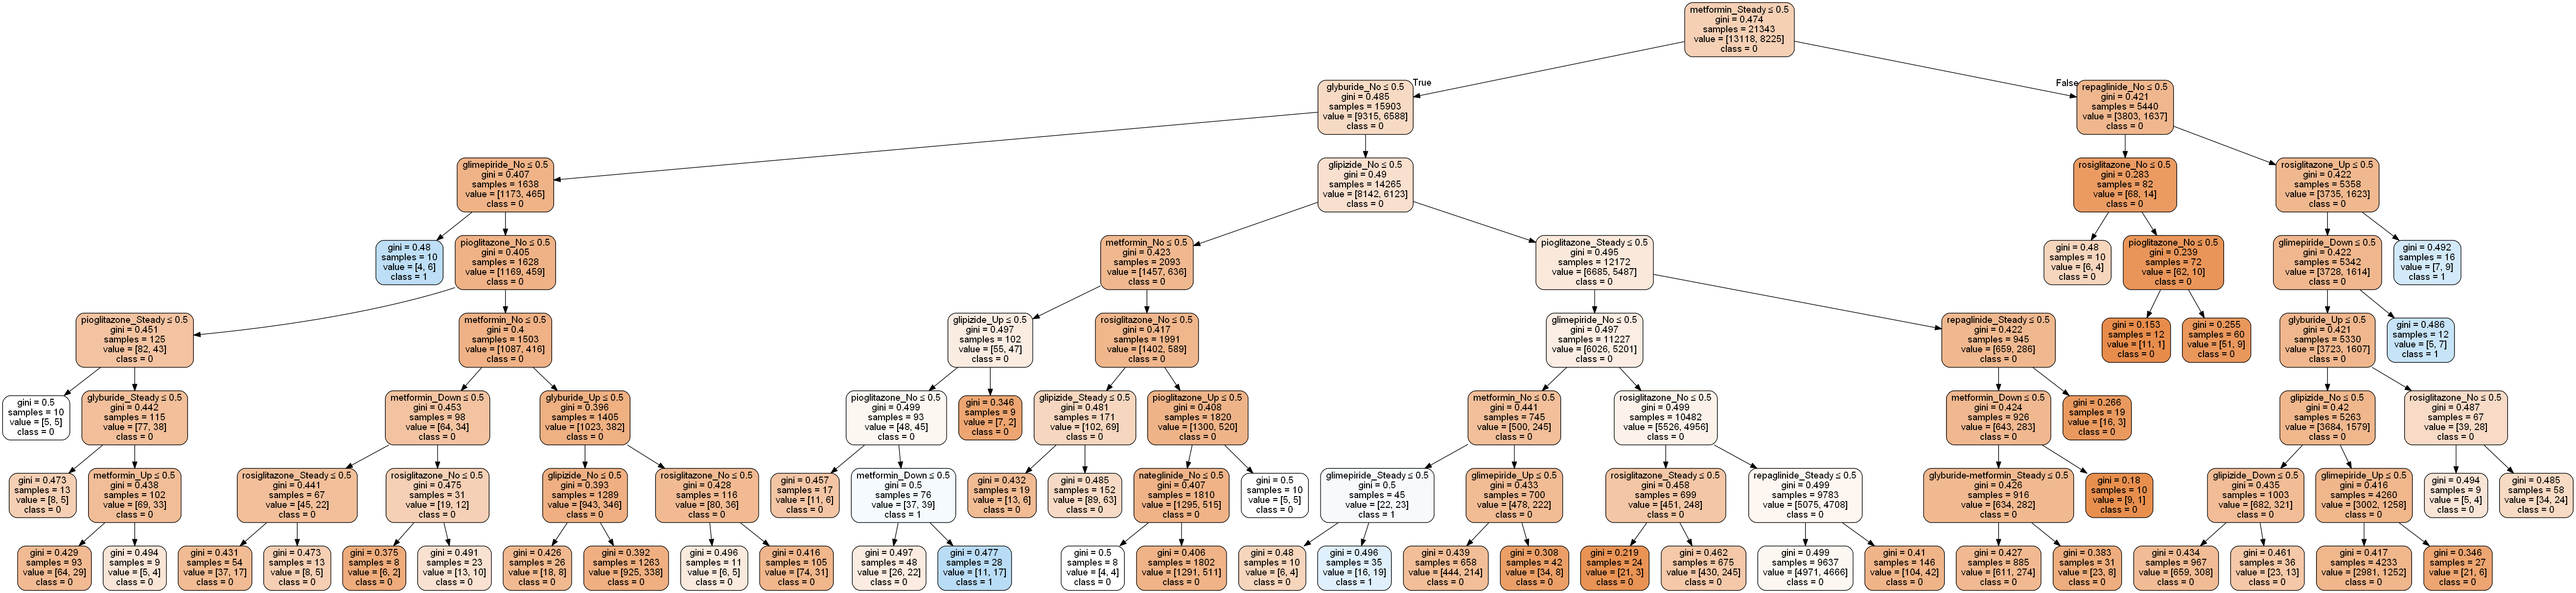

In [28]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(15)

0
metformin_Steady      0.266523
glipizide_No          0.200058
glyburide_No          0.158877
pioglitazone_Steady   0.116440
glimepiride_No        0.078919
rosiglitazone_No      0.069925
repaglinide_Steady    0.030504
metformin_No          0.024296
repaglinide_No        0.007222
rosiglitazone_Steady  0.006978
glyburide_Up          0.005663
rosiglitazone_Up      0.005535
glimepiride_Down      0.004868
pioglitazone_No       0.004722
metformin_Down        0.004566

# Logistic Regression

In [30]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
mat_logit = confusion_matrix(y_test,y_pred_test)
print("confusion matrix = \n",mat_logit)
print('accuracy_train=',accuracy_score(y_train,y_pred_train))
print('accuracy_test=',accuracy_score(y_test,y_pred_test))
print('auc_score_train=',roc_auc_score(y_train,y_pred_train))
print('auc_score_test=',roc_auc_score(y_test,y_pred_test))    

confusion matrix = 
 [[5591    9]
 [3536   11]]
accuracy_train= 0.6146277468022302
accuracy_test= 0.6124412375642287
auc_score_train= 0.5005668676789728
auc_score_test= 0.5007470347174675


# Model for insulin_No

In [31]:
X = data.drop(['insulin_Up','insulin_No','insulin_Steady','insulin_Down'],axis=1)
Y = data[['insulin_No']]
print(X.shape)
print(Y.shape)

(30490, 59)
(30490, 1)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21343, 59), (9147, 59), (21343, 1), (9147, 1))

# Decision Tree

In [33]:
for i in range(2,10):
    clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i, min_samples_leaf=5)
    clf_pruned.fit(X_train, y_train)
    preds_pruned_train = clf_pruned.predict(X_train)
    preds_pruned = clf_pruned.predict(X_test)
    mat_pruned = confusion_matrix(y_test,preds_pruned)
    print("for depth=",i)
    print("confusion matrix = \n",mat_pruned)
    print('accuracy_train=',accuracy_score(y_train,preds_pruned_train))
    print('accuracy_test=',accuracy_score(y_test,preds_pruned))
    print('auc_score_train=',roc_auc_score(y_train,preds_pruned_train))
    print('auc_score_test=',roc_auc_score(y_test,preds_pruned))
    print("*******************************************************************************")


for depth= 2
confusion matrix = 
 [[6127  441]
 [2100  479]]
accuracy_train= 0.726186571709694
accuracy_test= 0.7222040013119055
auc_score_train= 0.5586231668478177
auc_score_test= 0.5592935881444762
*******************************************************************************
for depth= 3
confusion matrix = 
 [[5759  809]
 [1509 1070]]
accuracy_train= 0.7453497633884646
accuracy_test= 0.7465835793156226
auc_score_train= 0.640563158881753
auc_score_test= 0.6458582661230334
*******************************************************************************
for depth= 4
confusion matrix = 
 [[5836  732]
 [1560 1019]]
accuracy_train= 0.7462868387761795
accuracy_test= 0.7494260413250246
auc_score_train= 0.6355053460017981
auc_score_test= 0.6418324667663822
*******************************************************************************
for depth= 5
confusion matrix = 
 [[5791  777]
 [1517 1062]]
accuracy_train= 0.7472239141638944
accuracy_test= 0.7492073904012244
auc_score_train= 0.6403719002

In [34]:
clf_pruned=DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,random_state=0)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

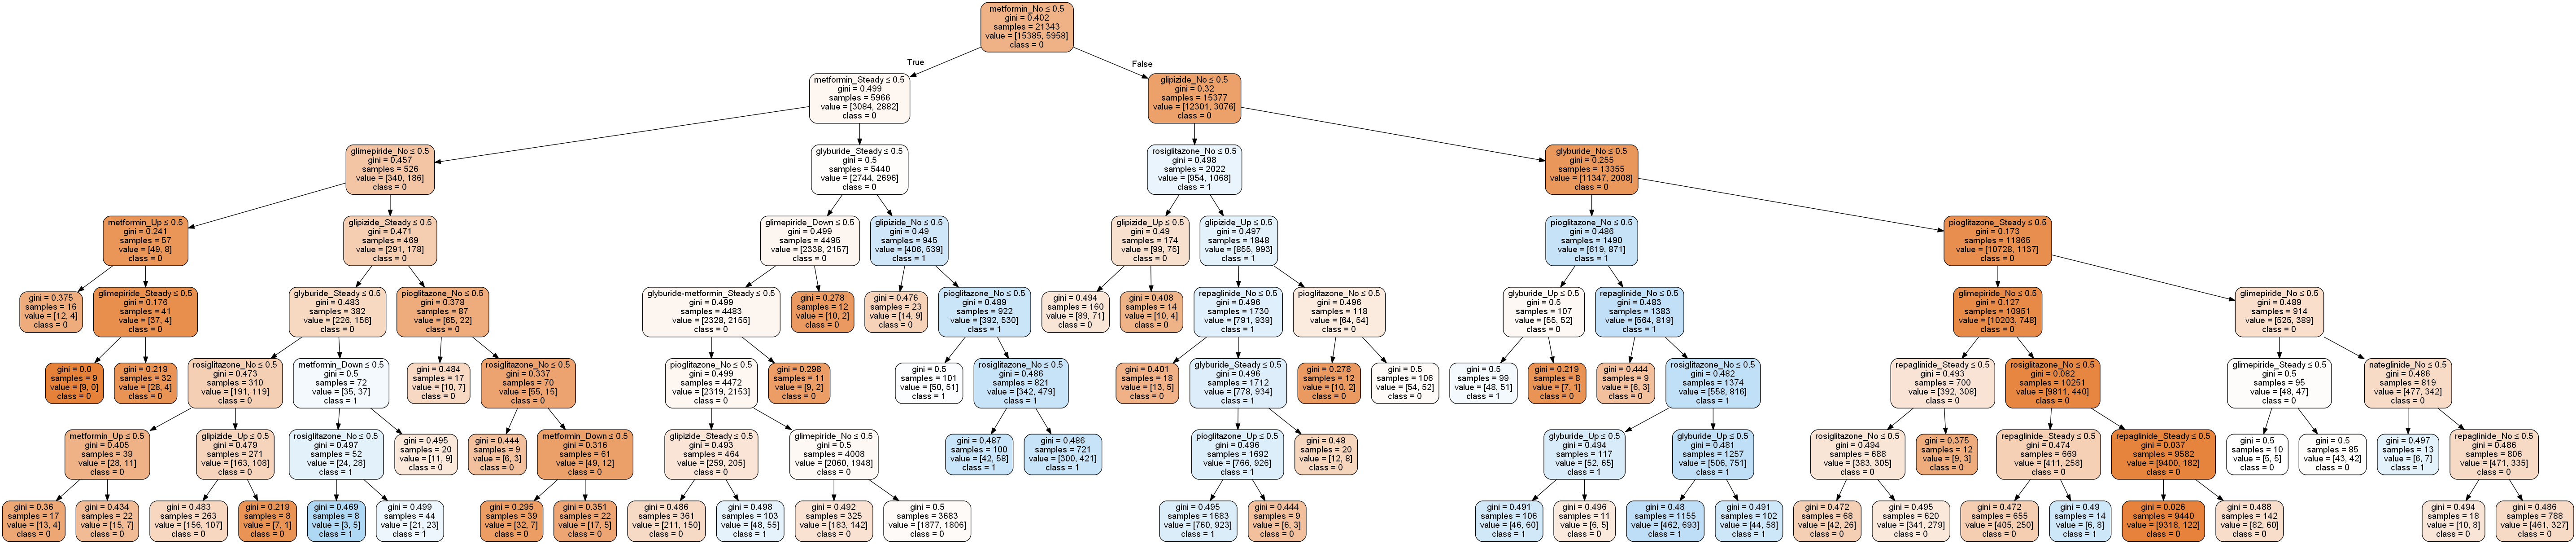

In [35]:
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(15)

0
metformin_No         0.270805
glyburide_No         0.248683
glipizide_No         0.197766
pioglitazone_Steady  0.084699
glimepiride_No       0.084611
rosiglitazone_No     0.068436
repaglinide_Steady   0.019195
metformin_Steady     0.007604
glyburide_Steady     0.006144
pioglitazone_No      0.003265
glipizide_Steady     0.002232
repaglinide_No       0.001494
glipizide_Up         0.001368
glyburide_Up         0.001056
glimepiride_Down     0.000928

# Logistic Regression

In [37]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
mat_logit = confusion_matrix(y_test,y_pred_test)
print("confusion matrix = \n",mat_logit)
print('accuracy_train=',accuracy_score(y_train,y_pred_train))
print('accuracy_test=',accuracy_score(y_test,y_pred_test))
print('auc_score_train=',roc_auc_score(y_train,y_pred_train))
print('auc_score_test=',roc_auc_score(y_test,y_pred_test))    

confusion matrix = 
 [[5821  747]
 [1844  735]]
accuracy_train= 0.7226256852363773
accuracy_test= 0.7167377282169017
auc_score_train= 0.5885488310929187
auc_score_test= 0.5856304658303103
